# Importing Libraries

In [48]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import os
import folium
import json

In [3]:
# Import JSON file
country_geo = r'C:\Users\navya\Achievement 6\02 Data\Raw Data\us-states.json'

In [4]:
# import JSON file for the US
country_geo

'C:\\Users\\navya\\Achievement 6\\02 Data\\Raw Data\\us-states.json'

# Import datasets

In [7]:
# Import dataset
path = r'C:\Users\navya\Achievement 6'
df_recipes = pd.read_csv(os.path.join(path, '02 Data', 'Raw Data', 'recipes.csv'))

In [8]:
df_recipes.head()

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0          0           0                0                     0   
1  23.0  1439.0          0           0                0                     0   
2   7.0   165.0          0           0                0                     0   
3   NaN     NaN          0           0                0                     0   
4  32.0   452.0          0           0                0                     0   

   ...  yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  \
0  ...              0       0        0     0         0          0          0   
1  ...              0       0        0     0         0          0          0   
2  ...              0       0        0     0         0          0          0   
3  ...              0       0        0     0         0          0          0   
4  ...              0       0        0     0         0          0          0   

   snack  snack week  turkey  
0      0           0       1  
1      0           0       0  
2      0           0       0  
3      0           0       0  
4      0           0       0  

[5 rows x 680 columns]

In [9]:
df_recipes.shape

(20052, 680)

# Data Wrangling

### Fix dummy columns

In [10]:
# Select only the necessary columns
columns = ['alabama', 'alaska', 'arizona', 'california', 'colorado', 'connecticut', 'florida', 'georgia',
          'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana',
          'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri',
          'nebraska', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'ohio', 
          'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'tennessee', 'texas',
          'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'title',
          'rating', 'calories', 'protein', 'fat', 'sodium']

In [13]:
# create a subset
state_rec = df_recipes[columns]
state_rec.head(1)

alabama  alaska  arizona  california  colorado  connecticut  florida  \
0        0       0        0           0         0            0        0   

   georgia  hawaii  idaho  ...  virginia  washington  west virginia  \
0        0       0      0  ...         0           0              0   

   wisconsin                            title  rating  calories  protein  fat  \
0          0  Lentil, Apple, and Turkey Wrap      2.5     426.0     30.0  7.0   

   sodium  
0   559.0  

[1 rows x 49 columns]

In [14]:
# select only the states
states_num = state_rec[['alabama', 'alaska', 'arizona', 'california', 'colorado', 'connecticut', 'florida', 'georgia',
          'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana',
          'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri',
          'nebraska', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'ohio', 
          'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'tennessee', 'texas',
          'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',]]

In [15]:
# turn dummy data in states columns into a categorical variable in s2 (a pandas Series data structure)
s2 = states_num.idxmax(axis=1)

In [16]:
s2

0           alabama
1           alabama
2          new york
3           alabama
4        california
            ...    
20047       alabama
20048       alabama
20049       alabama
20050       alabama
20051       alabama
Length: 20052, dtype: object

In [17]:
# check that s2 is a series
type(s2)

pandas.core.series.Series

In [32]:
# create new column 'state' in the state_rec dataframe
state_rec['STATE_NAME'] = s2

C:\Users\navya\AppData\Local\Temp\ipykernel_26828\815165970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = s2


In [33]:
state_rec.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       'STATE_NAME'],
      dtype='object')

In [34]:
# Drop the dummy columns from the dataframe
#state_rec.drop(columns= ['alabama', 'alaska', 'arizona', 'california', 'colorado', 'connecticut', 'florida', 'georgia',
 #         'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana',
  #        'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri',
   #       'nebraska', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'ohio', 
    #      'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'tennessee', 'texas',
     #     'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin'], inplace=True)

In [36]:
state_rec.head(3)

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   

    fat  sodium STATE_NAME  
0   7.0   559.0    alabama  
1  23.0  1439.0    alabama  
2   7.0   165.0   new york

In [37]:
type(state_rec)

pandas.core.frame.DataFrame

In [38]:
state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()

C:\Users\navya\AppData\Local\Temp\ipykernel_26828\476765381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['STATE_NAME'] = state_rec['STATE_NAME'].str.title()


In [39]:
state_rec.head(3)

title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   

    fat  sodium STATE_NAME  
0   7.0   559.0    Alabama  
1  23.0  1439.0    Alabama  
2   7.0   165.0   New York

# Consistency Checks

In [40]:
# check for missing values
state_rec.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
STATE_NAME       0
dtype: int64

In [42]:
# Impute missing values with median
state_rec['calories'].fillna(state_rec['calories'].median(), inplace=True)
state_rec['protein'].fillna(state_rec['protein'].median(), inplace=True)
state_rec['fat'].fillna(state_rec['fat'].median(), inplace=True)
state_rec['sodium'].fillna(state_rec['sodium'].median(), inplace=True)

C:\Users\navya\AppData\Local\Temp\ipykernel_26828\348643570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['calories'].fillna(state_rec['calories'].median(), inplace=True)
C:\Users\navya\AppData\Local\Temp\ipykernel_26828\348643570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['protein'].fillna(state_rec['protein'].median(), inplace=True)
C:\Users\navya\AppData\Local\Temp\ipykernel_26828\348643570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [43]:
# final check for missing values
state_rec.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
sodium        0
STATE_NAME    0
dtype: int64

# Duplicates Check

In [44]:
dups = state_rec.duplicated()

In [46]:
dups.shape

(20052,)

# Extreme Values Check

<Axes: xlabel='fat', ylabel='Count'>

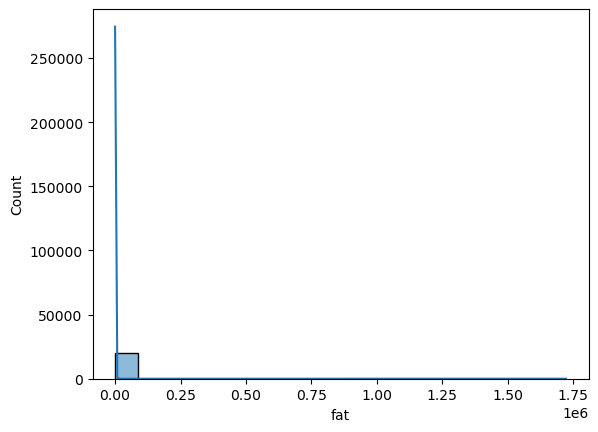

In [49]:
sns.histplot(state_rec['fat'], bins=20, kde = True) # shows extreme values for 'fat'

In [50]:
# check how many extreme values
state_rec[state_rec['fat'] > 1000]

title  rating    calories  \
1304         Rice Pilaf with Lamb, Carrots, and Raisins    5.000   4157357.0   
1837   Bacon-Wrapped Trout Stuffed with Balsamic Onio...   4.375     12010.0   
2976                      Lamb Köfte with Tarator Sauce    5.000   4518216.0   
3280             Braised Short Ribs with Red Wine Gravy    3.750     19576.0   
5138                     Caramelized Apple and Pear Pie    3.125   3358029.0   
6368                       Deep-Dish Wild Blueberry Pie    4.375  29997918.0   
6645   Braised Orange-Ginger Short Ribs with Dried Ap...   4.375     16050.0   
6912                               Chocolate-Almond Pie    3.125   3358273.0   
8192            Grilled Lamb Chops with Porcini Mustard    5.000     24117.0   
8873   Grilled Cumin Chicken Breasts with Avocado Salsa    3.750     22312.0   
9731         Rice Pilaf with Lamb, Carrots, and Raisins    5.000   4157357.0   
10509      Braised Duck Legs with Shallots and Parsnips    4.375     16761.0   
11391              Pear-Cranberry Mincemeat Lattice Pie    4.375  30111218.0   
12123  Grilled Cumin Chicken Breasts with Avocado Salsa    3.750     22312.0   
14628  Lamb Chops Scottadito\r\n                With ...   0.000     11453.0   
16007  Grilled Cumin Chicken Breasts with Avocado Salsa    3.750     22312.0   
19194           Grilled Lamb Chops with Porcini Mustard    5.000     24117.0   
19672                 Apricot, Cranberry and Walnut Pie    4.375  13062948.0   

        protein        fat      sodium STATE_NAME  
1304   236489.0   221495.0   3134853.0    Alabama  
1837      403.0     1115.0     18212.0    Alabama  
2976   166471.0    44198.0   7540990.0    Alabama  
3280      723.0     1818.0      2950.0    Alabama  
5138    58324.0   186642.0   3449373.0    Alabama  
6368   200210.0  1716279.0  27570999.0    Alabama  
6645      592.0     1480.0      2629.0    Alabama  
6912    58334.0   186660.0   3449512.0    Alabama  
8192      940.0     2228.0      4382.0    Alabama  
8873      332.0     1007.0     13820.0    Alabama  
9731   236489.0   221495.0   3134853.0    Alabama  
10509     477.0     1610.0      3097.0    Alabama  
11391  200968.0  1722763.0  27675110.0    Alabama  
12123     332.0     1007.0     13820.0    Alabama  
14628     447.0     1054.0      1749.0    Alabama  
16007     332.0     1007.0     13820.0    Alabama  
19194     940.0     2228.0      4382.0    Alabama  
19672   87188.0   747374.0  12005810.0    Alabama

In [51]:
# Clean extreme values with more than 500g of fat
state_rec = state_rec[state_rec['fat'] < 500]

In [52]:
state_rec.shape

(20012, 7)

In [54]:
# Create a cal_per_portion column
state_rec['cal_per_portion'] = state_rec['calories']*4

C:\Users\navya\AppData\Local\Temp\ipykernel_26828\3532567950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_rec['cal_per_portion'] = state_rec['calories']*4


<Axes: xlabel='cal_per_portion', ylabel='Count'>

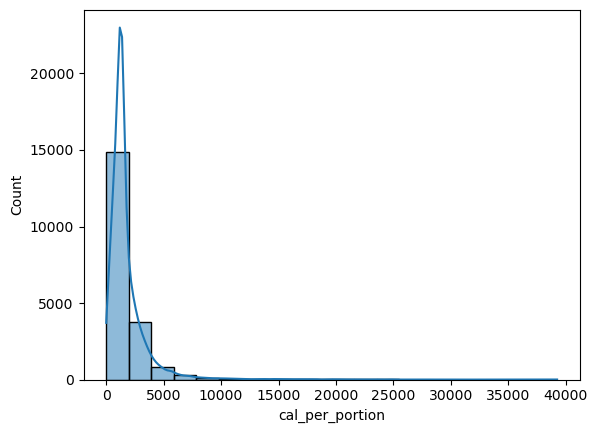

In [55]:
sns.histplot(state_rec['cal_per_portion'], bins=20, kde = True)  # shows extreme values for 'cal_per_portion'

In [56]:
# Clean extreme values in cal_per_portion
state_rec = state_rec[state_rec['cal_per_portion'] < 8000]

<Axes: xlabel='rating', ylabel='Count'>

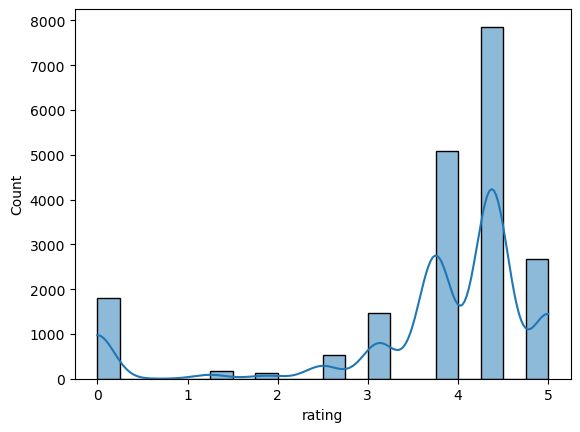

In [57]:
# check the rating variable
sns.histplot(state_rec['rating'], bins=20, kde=True)

In [58]:
# Select only entries with a non-zero rating
state_rec = state_rec[state_rec['rating'] >= 1]

In [59]:
state_rec.dtypes

title               object
rating             float64
calories           float64
protein            float64
fat                float64
sodium             float64
STATE_NAME          object
cal_per_portion    float64
dtype: object

# Plotting a choropleth

In [61]:
# Create a data frame with just the states and the values for rating we want plotted
data_to_plot = state_rec[['STATE_NAME','rating']]
data_to_plot.head()

STATE_NAME  rating
0     Alabama   2.500
1     Alabama   4.375
2    New York   3.750
3     Alabama   5.000
4  California   3.125

In [64]:
# Set up a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)
folium.Choropleth(geo_data = country_geo, data = data_to_plot, columns = ['STATE_NAME', 'rating'], 
                  key_on = 'feature.properties.name', fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
                  legend_name = 'rating').add_to(map), folium.LayerControl().add_to(map)
map

In [65]:
map.save('plot_data.html')